## Heat Conduction in a 2D bar

A heat conduction experiment is performed in a 2D bar with dimensions $50cm$ per $50 cm$ and thermal conductivity $\kappa = 34Wm^{-1}K^{-1}$. 
This bar is heated up during certain period of time, afterwards the temperature is measured 
in different points of the bar in the time $t_0$( Equally spaced measurements done from 0 to 50cm). 
After removing the
heat source, the temperature is measured for the times $t_1=3min$, $t_2=6min$, $t_3=9min$ and $t_3=12min$. 

Find the heat flux density in the bar for every single time. For this, take into account the Fourier's law given by

$$
\vec{q} = -\kappa \left( \frac{\partial T}{\partial x}\hat{i} +\frac{\partial T}{\partial y}\hat{j} \right) 
$$

where T(x,y) is a function with coupled variables. Plot a heat map for every time, what happens with the heat flux density over time? 

The files with the temperatures measured from https://github.com/NATYML/Comput_meth-hom/tree/master/Data/HeatBar. The first and second columns are the positions on the bar(x,y)and the third one is the temperature measured in ºC.

**Hint:** It has to be taken into account the dependence of y when derivating with respect to x and viceversa. Use the function meshgrid and inshow to solve the problem. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t0_dat = np.loadtxt("T0.dat")

t0x = t0_dat[:,0]      # Separo los datos
t0y = t0_dat[:,1]
t0  = t0_dat[:,2]

mapa_Temp0=np.zeros((20,20))
for i in range(20):
    for j in range(20):                #Reorganizo la matriz de temperatura 
        mapa_Temp0[i][j]=t0[i*20+j]

################################################## T0
t1_dat = np.loadtxt("T1.dat")

t1x = t1_dat[:,0]
t1y = t1_dat[:,1]
t1  = t1_dat[:,2]

mapa_Temp1=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        mapa_Temp1[i][j]=t1[i*20+j]

################################################## T1
t2_dat = np.loadtxt("T2.dat")

t2x = t2_dat[:,0]
t2y = t2_dat[:,1]
t2  = t2_dat[:,2]

mapa_Temp2=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        mapa_Temp2[i][j]=t2[i*20+j]
        
################################################## T2    
t3_dat = np.loadtxt("T3.dat")

t3x = t3_dat[:,0]
t3y = t3_dat[:,1]
t3  = t3_dat[:,2]

mapa_Temp3=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        mapa_Temp3[i][j]=t3[i*20+j]

################################################## T3
t4_dat = np.loadtxt("T4.dat")

t4x = t4_dat[:,0]
t4y = t4_dat[:,1]
t4  = t4_dat[:,2]

mapa_Temp4=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        mapa_Temp4[i][j]=t4[i*20+j]
################################################## T4

Text(0.5,1,'T4 = 12 min')

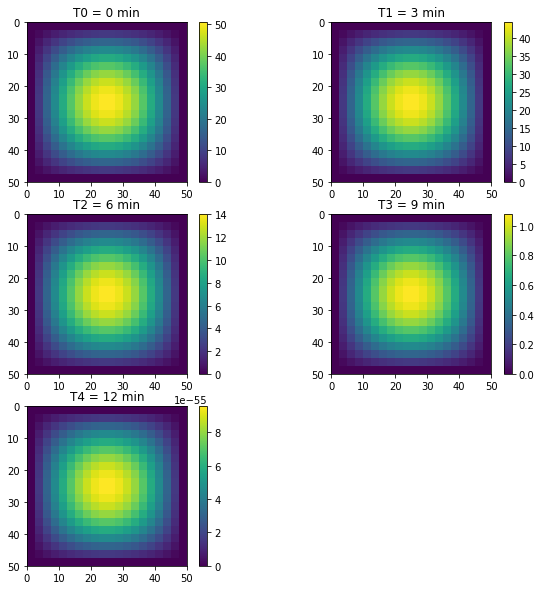

In [10]:
plt.figure(figsize=(10,10))   # Las gráficas de temperatura

plt.subplot(3,2,1)
plt.imshow(mapa_Temp0, extent=[0,50,50,0])
plt.colorbar()
plt.title("T0 = 0 min")

plt.subplot(3,2,2)
plt.imshow(mapa_Temp1, extent=[0,50,50,0])
plt.colorbar()
plt.title("T1 = 3 min")

plt.subplot(3,2,3)
plt.imshow(mapa_Temp2, extent=[0,50,50,0])
plt.colorbar()
plt.title("T2 = 6 min")

plt.subplot(3,2,4)
plt.imshow(mapa_Temp3, extent=[0,50,50,0])
plt.colorbar()
plt.title("T3 = 9 min")

plt.subplot(3,2,5)
plt.imshow(mapa_Temp4, extent=[0,50,50,0])
plt.colorbar()
plt.title("T4 = 12 min")

### En la escala se observa que la temperatura va disminuyendo, la barra se enfría 

In [4]:
## Funcion derivada hecha en clase

def dfdxi_pto(x_list,y_list,x):  ### Derivada en el punto x
    
        if  (x==x_list[0]): #Si el punto a derivar es el borde izquierdo
            
            x0 = x_list[0]
            y0 = y_list[0]
            
            x1 = x_list[1]
            y1 = y_list[1]
            
            x2 = x_list[2]
            y2 = y_list[2]
            
            xj = x0

        elif(x==x_list[len(x_list)-1]): #Si el punto a derivar es el borde derecho
            x0 = x_list[len(x_list)-1]
            y0 = y_list[len(y_list)-1]
            
            x1 = x_list[len(x_list)-2]
            y1 = y_list[len(y_list)-1]
            
            x2 = x_list[len(x_list)-3]
            y2 = y_list[len(y_list)-1] 
            xj = x0
            
        else:
            i=np.array(x_list).tolist().index(x)  #Esto es para ubicar la posicion del x en x_list y poder usar sus dos puntos contiguos
            x0 = x_list[i]
            y0 = y_list[i]
             
            x1 = x_list[i-1]
            y1 = y_list[i-1]
             
            x2 = x_list[i+1]
            y2 = y_list[i+1]
             
            xj = x0
             
        dL0dx = (2*xj-x1 -x2)/((x0-x1)*(x0-x2))
        dL1dx = (2*xj-x0-x2)/((x1-x0)*(x1-x2))
        dL2dx = (2*xj-x0-x1)/((x2-x0)*(x2-x1))
        
        return dL0dx*y0 + dL1dx*y1 + dL2dx*y2

In [5]:
## Redefino la funcion anterior para que arroje una lista con las derivadas en cada punto

#No hago correccion de una division por cero, porque los x's y los y's no se repiten 

def dfdxi_list(x_list,y_list):  
    return [dfdxi_pto(x_list,y_list,i) for i in x_list] 

In [7]:
## Como los q son vectores hay que hacer una grafica del campo

k = 34 # conductividad termica
qx0 = np.zeros((20,20))
qy0 = np.zeros((20,20))

for i in range(20): #Filas dx
    for j in range(20):
        qx0[i][j] = -k*dfdxi_list(t0x[i*20:(i+1)*20],t0[i*20:(i+1)*20])[j]  # Derivadas de la temperatura con respecto a x

for i in range(20): #Columnas dy
    for j in range(19):
        qy0[j][i] = -k*dfdxi_list(t0y[i::20],t0[i::20])[j]  # Derivadas de la temperatura con respecto a y 
######################################################### T0

qx1 = np.zeros((20,20))
qy1 = np.zeros((20,20))

for i in range(20): #Filas dx
    for j in range(20):
        qx1[i][j] = -k*dfdxi_list(t1x[i*20:(i+1)*20],t1[i*20:(i+1)*20])[j]

for i in range(20): #Columnas dy
    for j in range(19):
        qy1[j][i] = -k*dfdxi_list(t1y[i::20],t1[i::20])[j] 
######################################################### T1

qx2 = np.zeros((20,20))
qy2 = np.zeros((20,20))

for i in range(20): #Filas dx
    for j in range(20):
        qx2[i][j] = -k*dfdxi_list(t2x[i*20:(i+1)*20],t2[i*20:(i+1)*20])[j]

for i in range(20): #Columnas dy
    for j in range(19):
        qy2[j][i] = -k*dfdxi_list(t2y[i::20],t2[i::20])[j] 
######################################################### T2
qx3 = np.zeros((20,20))
qy3 = np.zeros((20,20))

for i in range(20): #Filas dx
    for j in range(20):
        qx3[i][j] = -k*dfdxi_list(t3x[i*20:(i+1)*20],t3[i*20:(i+1)*20])[j]

for i in range(20): #Columnas dy
    for j in range(19):
        qy3[j][i] = -k*dfdxi_list(t3y[i::20],t3[i::20])[j] 
######################################################### T3

qx4 = np.zeros((20,20))
qy4 = np.zeros((20,20))

for i in range(20): #Filas dx
    for j in range(20):
        qx4[i][j] = -k*dfdxi_list(t4x[i*20:(i+1)*20],t4[i*20:(i+1)*20])[j]

for i in range(20): #Columnas dy
    for j in range(19):
        qy4[j][i] = -k*dfdxi_list(t4y[i::20],t4[i::20])[j] 
######################################################### T4


Text(0.5,1,'T4 = 12 min')

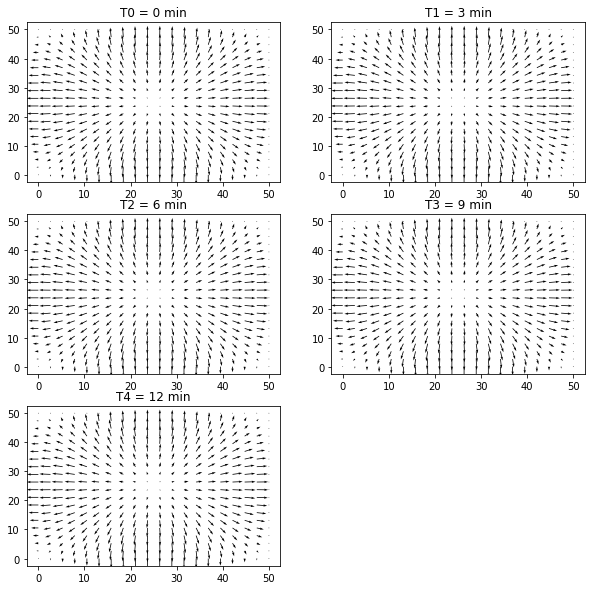

In [8]:
plt.figure(figsize=(10,10)) # Las gráficas de los campos

plt.subplot(3,2,1)
plt.quiver(t0x, t0y, qx0,qy0)
plt.title("T0 = 0 min")

plt.subplot(3,2,2)
plt.quiver(t1x, t1y, qx1,qy1)
plt.title("T1 = 3 min")

plt.subplot(3,2,3)
plt.quiver(t2x, t2y, qx2,qy2)
plt.title("T2 = 6 min")

plt.subplot(3,2,4)
plt.quiver(t3x, t3y, qx3,qy3)
plt.title("T3 = 9 min")

plt.subplot(3,2,5)
plt.quiver(t4x, t4y, qx4,qy4)
plt.title("T4 = 12 min")

### La densidad de flujo de calor se mantiene igual en el tiempo 